# Bibliotecas

In [1]:
import pandas as pd

# Datos

In [2]:
# Ruta al archivo
file_path = "../data/Towns_HB_2024-08-14.xlsx"

# Leer todas las hojas como un diccionario {nombre_hoja: DataFrame}
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Filtrar solo las hojas que tienen datos (al menos una fila no vacía)
non_empty_sheets = {name: df for name, df in all_sheets.items() if not df.dropna(how='all').empty}

# Mostrar nombres de hojas con datos
print(f"Hojas con datos: {list(non_empty_sheets.keys())}")

Hojas con datos: ['Towns', 'Triple Alliance towns', 'Tenochtitlan', 'Zempoala', '79 Destinations', 'Tecpilpan']


In [3]:
df_towns = non_empty_sheets["Towns"]
df_triple_alliance = non_empty_sheets["Triple Alliance towns"]
df_tenochtitlan = non_empty_sheets["Tenochtitlan"]
df_zempoala = non_empty_sheets["Zempoala"]
df_79 = non_empty_sheets["79 Destinations"]
df_tecpilpan = non_empty_sheets["Tecpilpan"]

# EDA

In [4]:
print(f"Towns: {len(df_towns)} filas")
print(f"Triple Alliance towns: {len(df_triple_alliance)} filas")
print(f"Tenochtitlan: {len(df_tenochtitlan)} filas")
print(f"Zempoala: {len(df_zempoala)} filas")
print(f"79 Destinations: {len(df_79)} filas")
print(f"Tecpilpan: {len(df_tecpilpan)} filas")


Towns: 80 filas
Triple Alliance towns: 3 filas
Tenochtitlan: 1 filas
Zempoala: 1 filas
79 Destinations: 79 filas
Tecpilpan: 1 filas


In [5]:
# Lista de tus DataFrames
dataframes = [
    df_towns,
    df_triple_alliance,
    df_tenochtitlan,
    df_zempoala,
    df_79,
    df_tecpilpan
]

# Verifica si todas las columnas son iguales
first_cols = dataframes[0].columns.tolist()
all_same = all(df.columns.tolist() == first_cols for df in dataframes)

if all_same:
    print("✅ Todos los DataFrames tienen las mismas columnas.")
else:
    print("⚠️ No todos los DataFrames tienen las mismas columnas.")
    for i, df in enumerate(dataframes):
        print(f"\n📄 DataFrame {i+1} columnas:")
        print(df.columns.tolist())


⚠️ No todos los DataFrames tienen las mismas columnas.

📄 DataFrame 1 columnas:
['Clave', 'Toponym', 'PopSV', 'PopJV', 'Population', 'PopulationRank', 'Pop-Ref', 'Revisado', 'Homonym', 'idGibson', 'idGA', 'idHB', 'idSV', 'idHicks', 'ModernName', 'OtherNames', 'Municipality', 'State', 'Latitude', 'Longitude', 'CoordSource', 'Ethnicity', 'Politics', 'Realm', 'Estatus', 'SubjectTo', 'PoliticalCode', 'PoliticalRank', 'Territory', 'nSubjectTowns', 'TerritorialRank', 'Military', 'Tribute', 'Tributaries', 'Economy', 'Market', 'EarlyMartekStatus', 'LateMarketStatus', 'Dock', 'CeremonialCenter', 'Other', 'Bibliography', 'Observations', 'SourcePlacename', 'NameTranslation', 'TranslatedBy', 'SourceGlyph', 'ChangeName']

📄 DataFrame 2 columnas:
['Clave', 'Toponym', 'PopSV', 'PopJV', 'Population', 'PopulationRank', 'Pop-Ref', 'Revisado', 'Homonym', 'idGibson', 'idGA', 'idHB', 'idSV', 'idHicks', 'ModernName', 'OtherNames', 'Municipality', 'State', 'Latitude', 'Longitude', 'CoordSource', 'Ethnicity',

In [6]:
# Paso 1: Diccionario con los nombres y DataFrames originales
dataframes = {
    "Towns": df_towns,
    "Triple Alliance towns": df_triple_alliance,
    "Tenochtitlan": df_tenochtitlan,
    "Zempoala": df_zempoala,
    "79 Destinations": df_79,
    "Tecpilpan": df_tecpilpan
}

# Paso 2: Obtener el conjunto total de columnas únicas
all_columns = set()
for df in dataframes.values():
    all_columns.update(df.columns)

# Paso 3: Reindexar cada DataFrame y agregar columna 'Hoja'
aligned_dfs = []
for name, df in dataframes.items():
    df_aligned = df.reindex(columns=all_columns)
    df_aligned.insert(0, "Hoja", name)
    aligned_dfs.append(df_aligned)

# Paso 4: Unir todos los DataFrames
df_unificado = pd.concat(aligned_dfs, ignore_index=True)

# Resultado
print(f"✅ DataFrame combinado con {df_unificado.shape[0]} filas y {df_unificado.shape[1]} columnas.")


✅ DataFrame combinado con 165 filas y 50 columnas.


In [7]:
display(df_unificado)

,Hoja,Estatus,Tributaries,PoliticalRank,ChangeName,State,Bibliography,idGibson,TerritorialRank,Municipality,...,Dock,idHicks,Longitude,OtherNames,PoliticalCode,Territory,Pop-Ref,Revisado,idHB,Economy
0,Towns,Tlatoani Head town,No data,3.0,NaN,Estado de México,NaN,Gibson-079,5.0,Ozumba,...,NaN,NaN,-98.801620,NaN,TC,Chimalhuacan Chalco was located just outside t...,JV: 203,1,HB-01,"Mamalhuazacan, a sujeto, had a five-day market..."
1,Towns,Tlatoani Head town,No data,3.0,NaN,Estado de México,NaN,Gibson-013,4.0,Amecameca,...,NaN,NaN,-98.769811,Amecameca,TC,Amecamecan's territory contained 12-13 small v...,JV: 203,1,HB-02,Regional market (Chimalpahin 1965: 205). Wood-...
2,Towns,Tlatoani Head town,No data,3.0,NaN,Estado de México,NaN,Gibson-312,3.0,Tenango del Aire,...,NaN,NaN,-98.861296,NaN,TC,"Tenanco's 16 towns included Ayotzinco, Pahuaca...",JV: 203,1,HB-03,No information found.
3,Towns,Provincial center; tlatoani Head town,No data,2.0,NaN,Estado de México,NaN,Gibson-360,3.0,Tlalmanalco,...,NaN,NaN,-98.801779,NaN,PC,"By the early 1500s, Tlalmanalco claimed 17 sub...",JV: 203,1,HB-04,No evidence of production specializations or m...
4,Towns,Tlatoani Head town sujeto estancia,14842,3.0,NaN,Edo. de México,NaN,Gibson-066,5.0,Chalco,...,P,NaN,-98.896400,Tlacochalco,TC,"In late pre-Hispanic times, Chalco Atenco had ...",JV: 203,1,HB-05,The principal Chalca center and an important s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,79 Destinations,Sujeto estancia?,No data,5.0,NaN,Estado de México,NaN,Gibson-042,-1.0,Chalco,...,NaN,NaN,-98.929377,NaN,U,No data,No data,1,HB-76,NaN
161,79 Destinations,No data,No data,3.0,NaN,Hidalgo,NaN,NaN,4.0,Tepeji del Río de Ocampo,...,NaN,H-62,-99.341728,Tepexic; Tepaxic; Tepexe; Tepeji,TC,No information about pre-Hispanic territory. C...,JV: 197,1,HB-77,NaN
162,79 Destinations,No data,No data,3.0,NaN,Hidalgo,NaN,NaN,5.0,Ajacuba,...,NaN,NaN,-99.157248,"Tetapanco,, Tetebanco",TC,"Five subject towns: Matepetonco, Xumultepec, T...","Borah_&_Cook_1960_SVp. 91, 97",1,HB-78,NaN
163,79 Destinations,Administered town,No data,4.0,NaN,Hidalgo,NaN,NaN,6.0,Zempoala,...,NaN,NaN,-98.582947,"Cempoala, Cmpoallan, Tzacuala, Tzacualpan",AT,"Tzaqualpan's four sujetos were: Acxotla, Mexot...",No data,0,HB-79,No market or production information found.


In [8]:
df_unificado.columns

Index(['Hoja', 'Estatus', 'Tributaries', 'PoliticalRank', 'ChangeName',
       'State', 'Bibliography', 'idGibson', 'TerritorialRank', 'Municipality',
       'Latitude', 'Toponym', 'Realm', 'SubjectTo', 'Politics',
       'SourcePlacename', 'Other', 'Population', 'Observations',
       'EarlyMartekStatus', 'CeremonialCenter', 'idSV', 'Market', 'PopSV',
       'Clave', 'TranslatedBy', 'idGA', 'PopulationRank', 'Homonym',
       'nSubjectTowns', 'Ethnicity', 'Military', 'VivSV', 'Tribute', 'PopJV',
       'ModernName', 'SourceGlyph', 'LateMarketStatus', 'NameTranslation',
       'CoordSource', 'Dock', 'idHicks', 'Longitude', 'OtherNames',
       'PoliticalCode', 'Territory', 'Pop-Ref', 'Revisado', 'idHB', 'Economy'],
      dtype='object')

In [9]:
# Contar valores únicos por columna
unique_counts = df_unificado.nunique().sort_values(ascending=False)
unique_values = df_unificado.apply(lambda col: col.dropna().unique())

# Crear DataFrame con nombres de columna, número de valores únicos y los valores
unique_counts_df = pd.DataFrame({
    'Columna': unique_counts.index,
    'Valores Únicos': unique_counts.values,
    'Lista de valores únicos': unique_counts.index.map(lambda col: unique_values[col])
})

print(unique_counts_df)

              Columna  Valores Únicos  \
0             Toponym              81   
1               Clave              81   
2          ModernName              81   
3                idHB              81   
4           Longitude              80   
5            Latitude              80   
6             Homonym              78   
7         CoordSource              76   
8            Politics              72   
9           Territory              71   
10            Tribute              68   
11           Military              67   
12            Economy              64   
13         OtherNames              61   
14       Municipality              58   
15         Population              53   
16           idGibson              53   
17            idHicks              52   
18               idSV              50   
19       Observations              48   
20              Other              45   
21              PopJV              38   
22        Tributaries              33   
23              

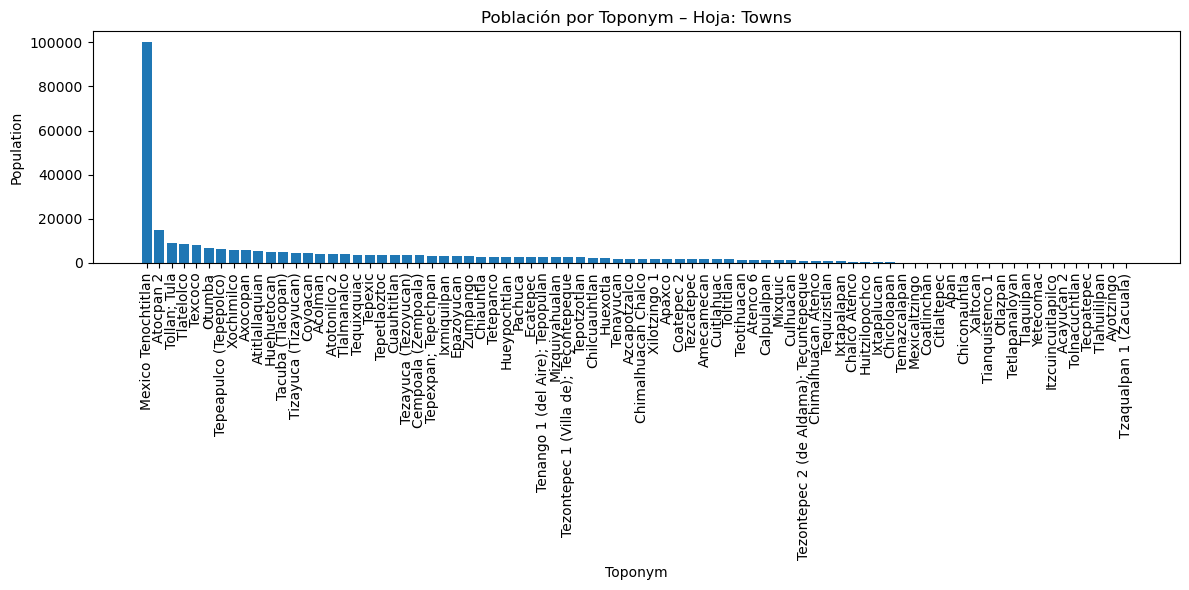

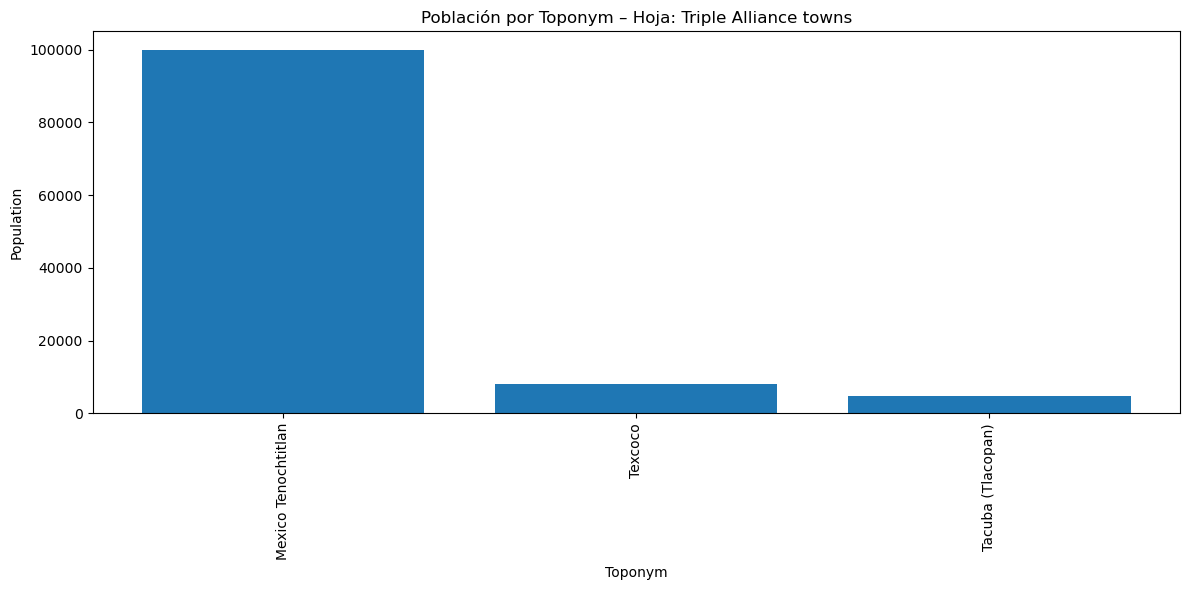

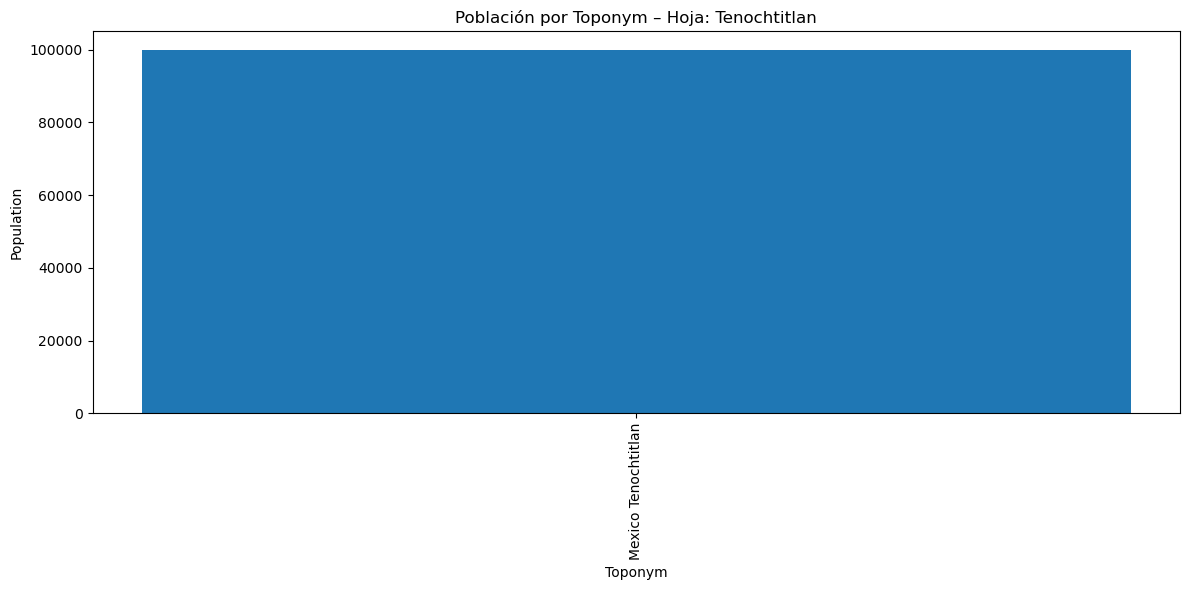

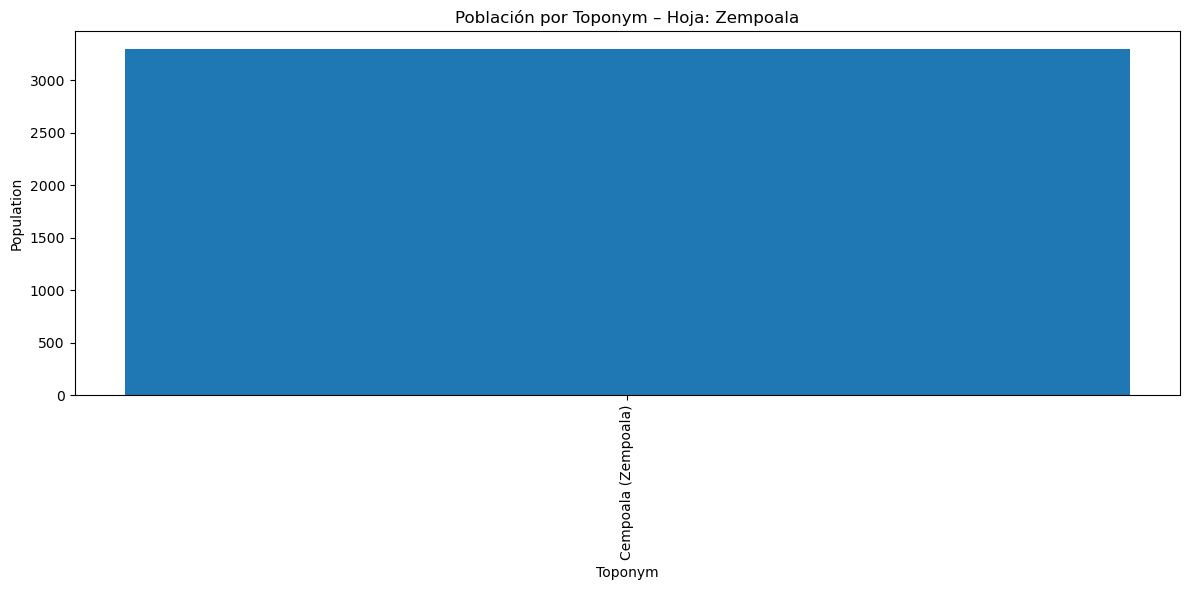

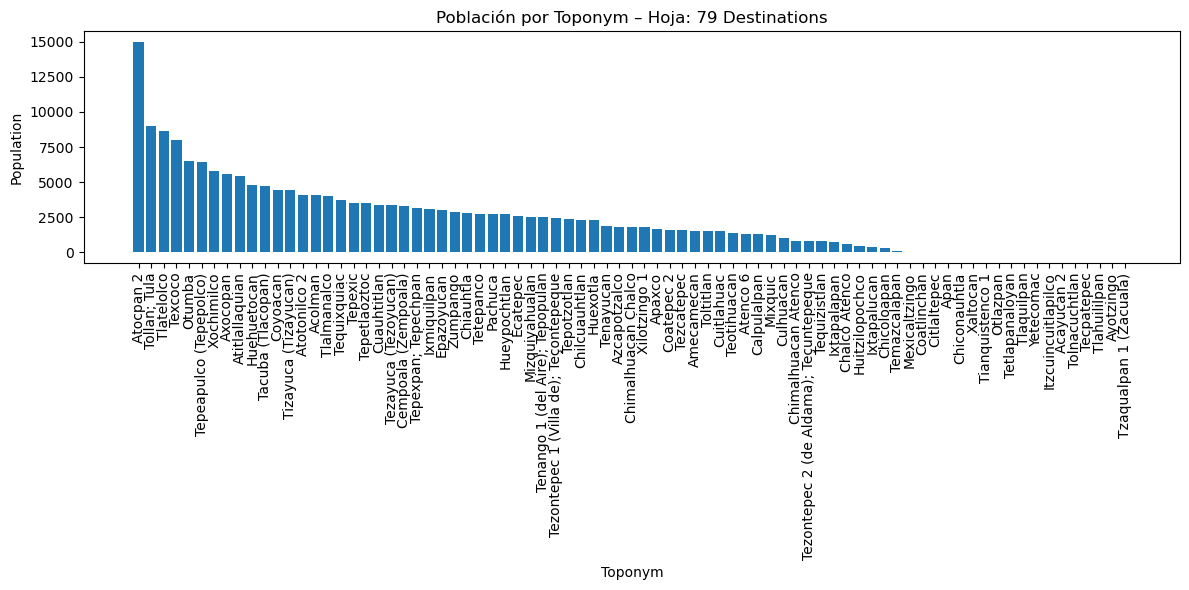

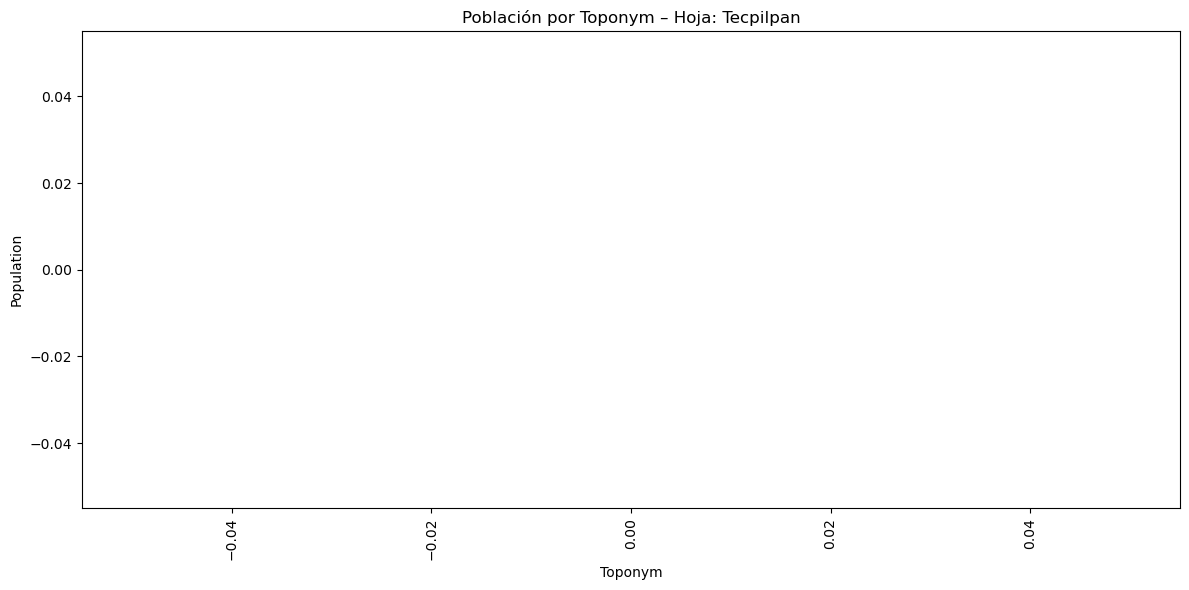

In [10]:
import matplotlib.pyplot as plt

# Asegúrate de que Population es numérica
df_unificado['Population'] = pd.to_numeric(df_unificado['Population'], errors='coerce')

# Obtener valores únicos de la columna 'Hoja'
hojas = df_unificado['Hoja'].unique()

# Generar un histograma por cada hoja
for hoja in hojas:
    df_hoja = df_unificado[df_unificado['Hoja'] == hoja]
    df_hoja = df_hoja.dropna(subset=['Population', 'Toponym'])

    # Ordenar por población para claridad
    df_hoja_sorted = df_hoja.sort_values(by='Population', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_hoja_sorted['Toponym'], df_hoja_sorted['Population'])
    plt.xticks(rotation=90)
    plt.title(f"Población por Toponym – Hoja: {hoja}")
    plt.xlabel("Toponym")
    plt.ylabel("Population")
    plt.tight_layout()
    plt.show()


In [11]:
df_towns.columns


Index(['Clave', 'Toponym', 'PopSV', 'PopJV', 'Population', 'PopulationRank',
       'Pop-Ref', 'Revisado', 'Homonym', 'idGibson', 'idGA', 'idHB', 'idSV',
       'idHicks', 'ModernName', 'OtherNames', 'Municipality', 'State',
       'Latitude', 'Longitude', 'CoordSource', 'Ethnicity', 'Politics',
       'Realm', 'Estatus', 'SubjectTo', 'PoliticalCode', 'PoliticalRank',
       'Territory', 'nSubjectTowns', 'TerritorialRank', 'Military', 'Tribute',
       'Tributaries', 'Economy', 'Market', 'EarlyMartekStatus',
       'LateMarketStatus', 'Dock', 'CeremonialCenter', 'Other', 'Bibliography',
       'Observations', 'SourcePlacename', 'NameTranslation', 'TranslatedBy',
       'SourceGlyph', 'ChangeName'],
      dtype='object')

In [12]:
# Count unique values for each column in df_towns
unique_counts = df_towns.nunique()

print(unique_counts)


Clave                80
Toponym              80
PopSV                19
PopJV                38
Population           53
PopulationRank        7
Pop-Ref              19
Revisado              2
Homonym              78
idGibson             53
idGA                 26
idHB                 80
idSV                 50
idHicks              52
ModernName           80
OtherNames           61
Municipality         58
State                 5
Latitude             80
Longitude            80
CoordSource          76
Ethnicity             8
Politics             71
Realm                 3
Estatus              20
SubjectTo            18
PoliticalCode         7
PoliticalRank         5
Territory            70
nSubjectTowns        26
TerritorialRank       7
Military             66
Tribute              67
Tributaries          30
Economy              64
Market                3
EarlyMartekStatus     3
LateMarketStatus      3
Dock                  1
CeremonialCenter      0
Other                45
Bibliography    

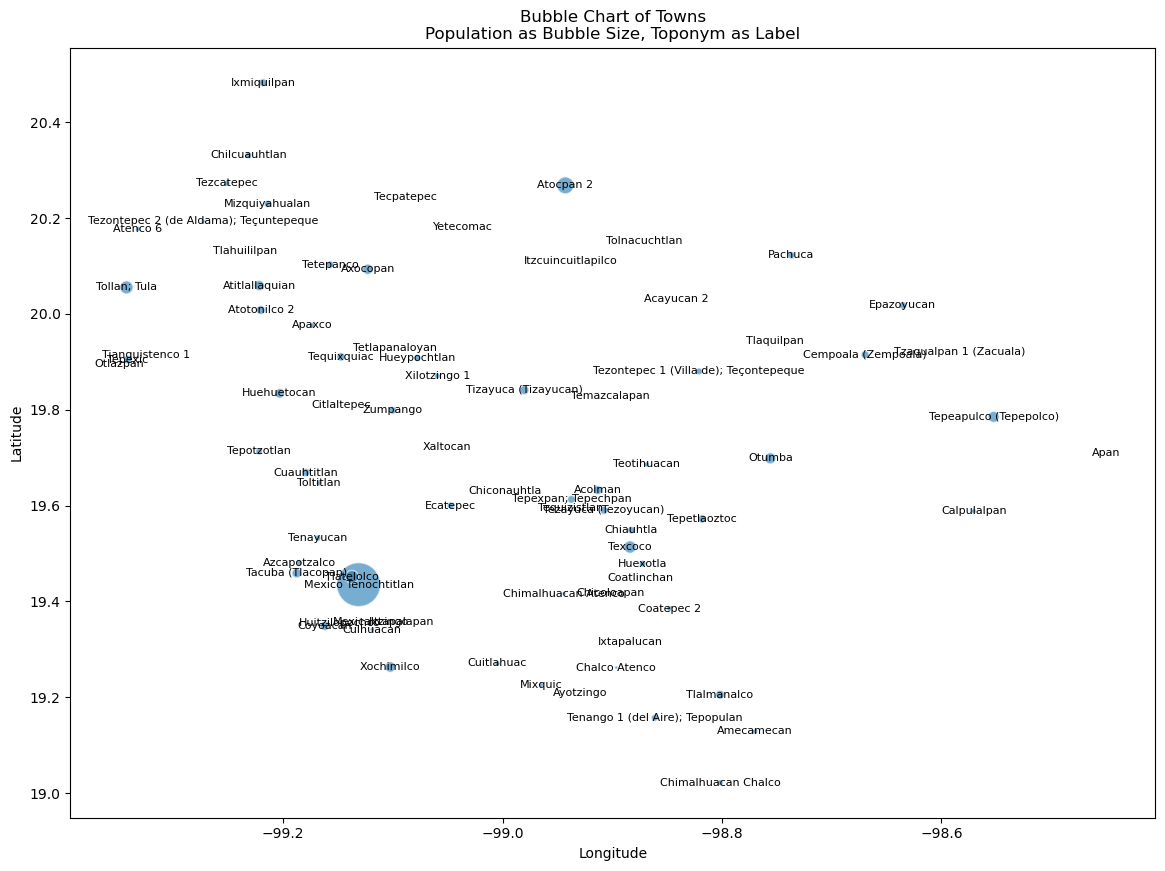

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Bubble chart
plt.scatter(df_towns['Longitude'], df_towns['Latitude'],
            s=df_towns['Population'] / 100,  # Adjust bubble size
            alpha=0.6, edgecolors='w')

# Add labels (Toponym) to each bubble
for i, row in df_towns.iterrows():
    plt.text(row['Longitude'], row['Latitude'], str(row['Toponym']),
             fontsize=8, ha='center', va='center')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bubble Chart of Towns\nPopulation as Bubble Size, Toponym as Label')

plt.show()


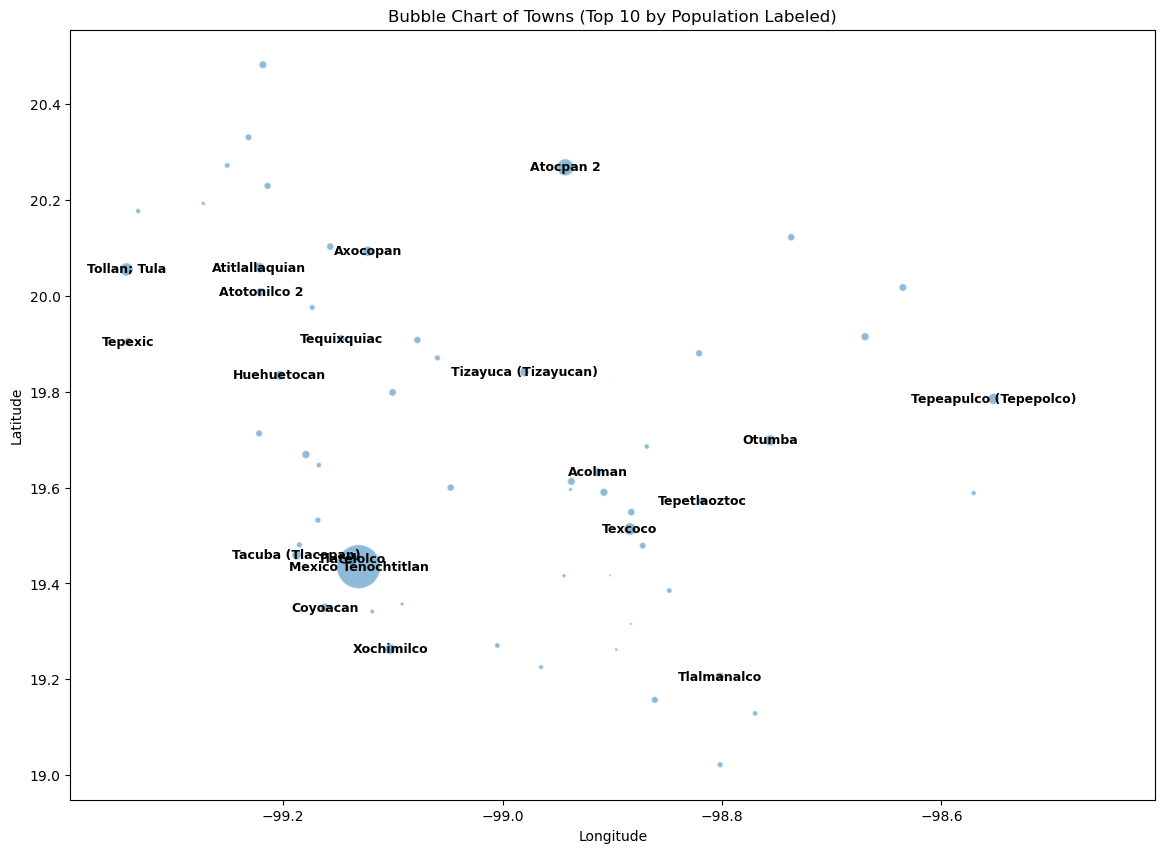

In [17]:
import matplotlib.pyplot as plt

# Sort and select top 10 towns by Population
top_towns = df_towns.sort_values('Population', ascending=False).head(20)

plt.figure(figsize=(14, 10))

# Plot all bubbles
plt.scatter(df_towns['Longitude'], df_towns['Latitude'],
            s=df_towns['Population'] / 100,
            alpha=0.5, edgecolors='w')

# Plot labels only for top towns
for i, row in top_towns.iterrows():
    plt.text(row['Longitude'], row['Latitude'], str(row['Toponym']),
             fontsize=9, ha='center', va='center', weight='bold')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bubble Chart of Towns (Top 10 by Population Labeled)')

plt.show()


/tmp/ipykernel_11450/2205011431.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlBu_r', num_ranks)


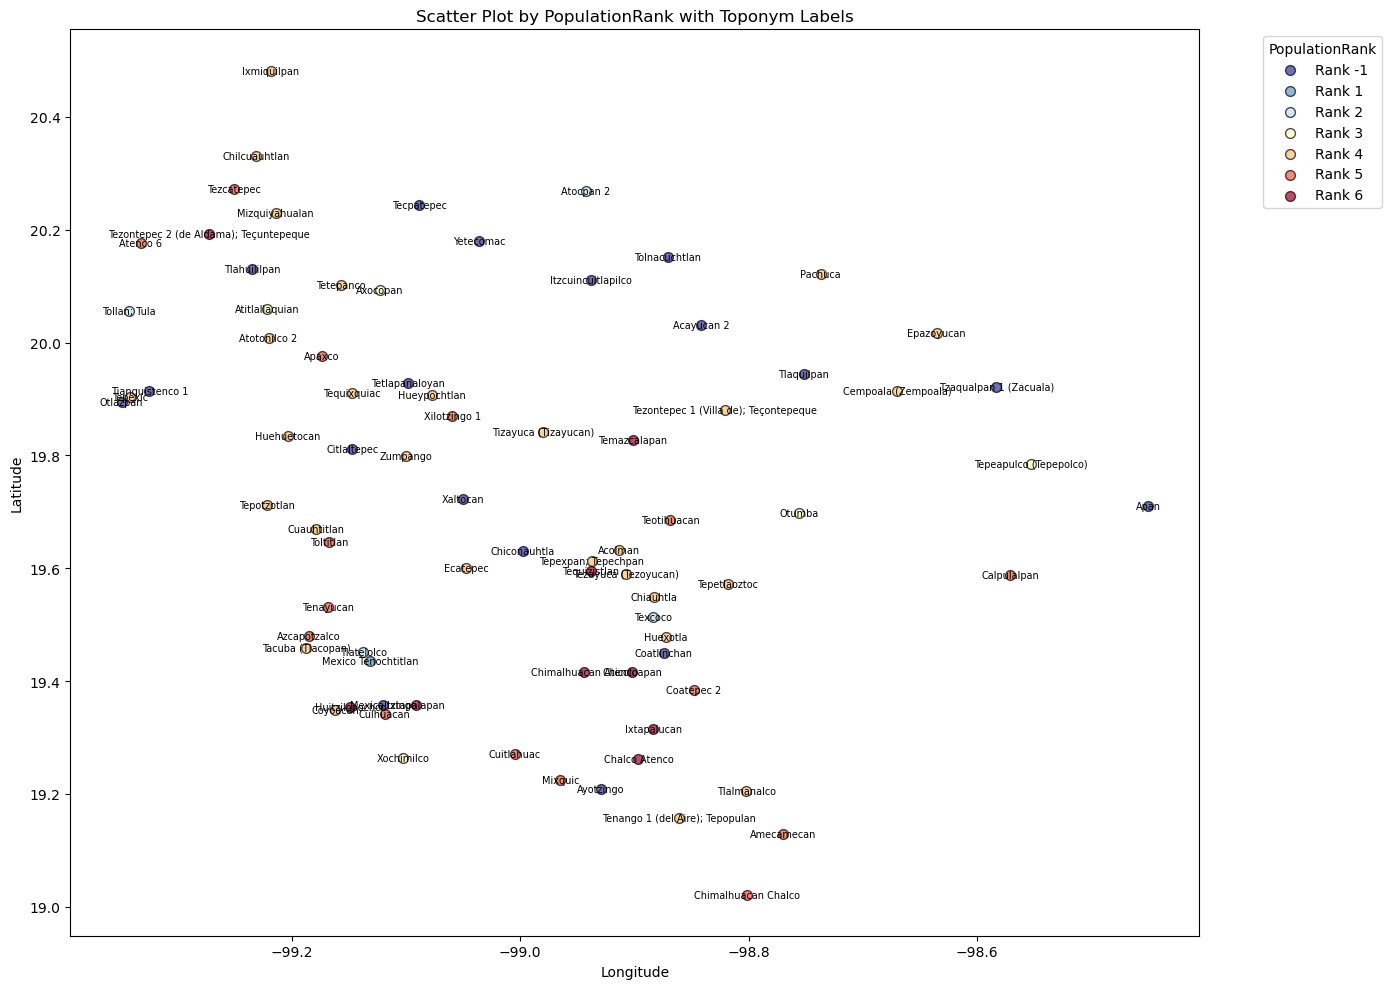

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Ensure PopulationRank is numeric
df_towns['PopulationRank'] = pd.to_numeric(df_towns['PopulationRank'], errors='coerce')

# Get unique sorted ranks
unique_ranks = sorted(df_towns['PopulationRank'].dropna().unique())
num_ranks = len(unique_ranks)

# Colormap: red (low) → blue (high)
cmap = cm.get_cmap('RdYlBu_r', num_ranks)
rank_to_color = {rank: cmap(i) for i, rank in enumerate(unique_ranks)}

plt.figure(figsize=(14, 10))

# Scatter and labels
for rank in unique_ranks:
    subset = df_towns[df_towns['PopulationRank'] == rank]
    plt.scatter(subset['Longitude'], subset['Latitude'],
                color=rank_to_color[rank],
                label=f'Rank {int(rank)}',
                s=50, alpha=0.7, edgecolors='k')
    
    # Add Toponym labels for this subset
    for i, row in subset.iterrows():
        plt.text(row['Longitude'], row['Latitude'], str(row['Toponym']),
                 fontsize=7, ha='center', va='center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot by PopulationRank with Toponym Labels')
plt.legend(title='PopulationRank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
# Find columns with 'Rank' in their name
rank_columns = [col for col in df_towns.columns if 'Rank' in col]

print("Columns related to Rank:", rank_columns)


Columns related to Rank: ['PopulationRank', 'PoliticalRank', 'TerritorialRank']


In [21]:
for col in rank_columns:
    unique_vals = df_towns[col].dropna().unique()
    print(f"🔸 {col}: {len(unique_vals)} unique values → {sorted(unique_vals)}")


🔸 PopulationRank: 7 unique values → [np.int64(-1), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
🔸 PoliticalRank: 5 unique values → [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
🔸 TerritorialRank: 7 unique values → [np.int64(-1), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


/tmp/ipykernel_11450/3918321986.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlBu_r', num_ranks)


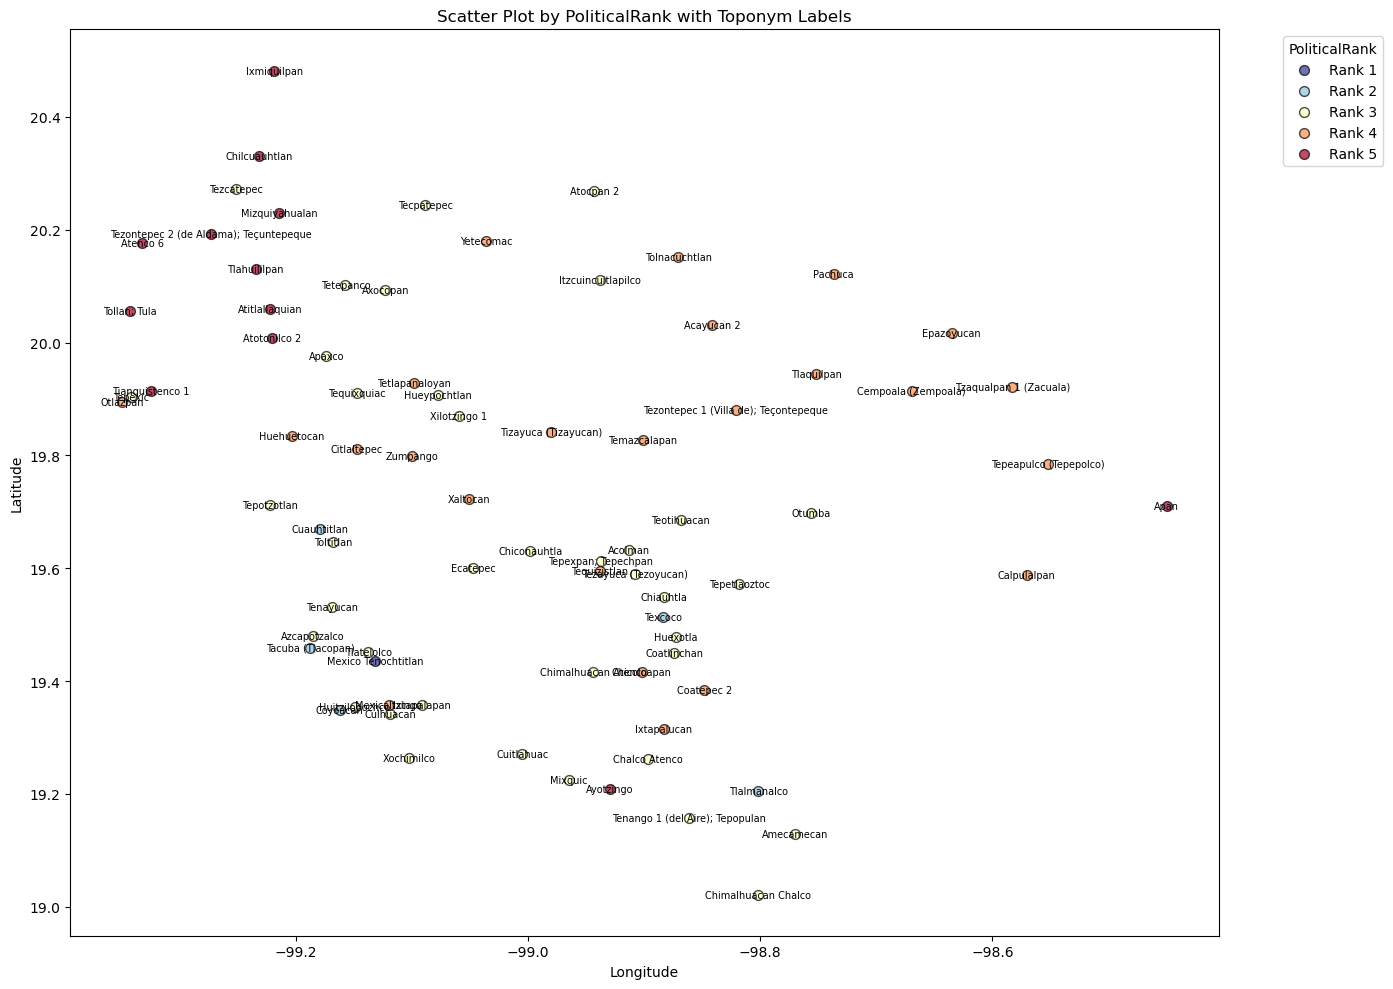

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Ensure PopulationRank is numeric
df_towns['PoliticalnRank'] = pd.to_numeric(df_towns['PoliticalRank'], errors='coerce')

# Get unique sorted ranks
unique_ranks = sorted(df_towns['PoliticalRank'].dropna().unique())
num_ranks = len(unique_ranks)

# Colormap: red (low) → blue (high)
cmap = cm.get_cmap('RdYlBu_r', num_ranks)
rank_to_color = {rank: cmap(i) for i, rank in enumerate(unique_ranks)}

plt.figure(figsize=(14, 10))

# Scatter and labels
for rank in unique_ranks:
    subset = df_towns[df_towns['PoliticalRank'] == rank]
    plt.scatter(subset['Longitude'], subset['Latitude'],
                color=rank_to_color[rank],
                label=f'Rank {int(rank)}',
                s=50, alpha=0.7, edgecolors='k')
    
    # Add Toponym labels for this subset
    for i, row in subset.iterrows():
        plt.text(row['Longitude'], row['Latitude'], str(row['Toponym']),
                 fontsize=7, ha='center', va='center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot by PoliticalRank with Toponym Labels')
plt.legend(title='PoliticalRank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [24]:
columns_to_check = ['Estatus', 'SubjectTo', 'PoliticalCode', 'nSubjectTowns']

for col in columns_to_check:
    unique_vals = df_towns[col].dropna().unique()
    print(f"🔸 {col} → {len(unique_vals)} unique values: {sorted(unique_vals)}")


🔸 Estatus → 20 unique values: ['Administered town', 'Administered town with appointed tlatoani; the most important market town', 'Administered town; Calpixqui town', 'Administered town; important tribute collecion point', 'Administered town; tlatoani Head town y Head town de corregimiento', 'Calpixqui town', 'Calpixqui town sujeto estancia', 'Head town', 'Head town sujeto estancia', 'Head town sujeto estancia?', 'Head town?', 'Imperial capital; tlatoani Head town', 'No data', 'Provincial center: tlatoani Head town', 'Provincial center; tlatoani Head town', 'Pueblo', 'Regional capital; tlatoani Head town', 'Sujeto estancia?', 'Tlatoani Head town', 'Tlatoani Head town sujeto estancia']
🔸 SubjectTo → 18 unique values: ['Apaxco (HB 1996)', 'Apaxco? (HB 1996)', 'Cabecera', 'Cabecera por sí', 'Cabecera sujeta a la Triple Alianza', 'Cempoala (Zempoala)', 'Coatepec', 'Cuauhtitlan', 'Hueypoxtla', 'No data', 'Tenango', 'Tenochtitlan', 'Tenochtitlan (HB 1996)', 'Tepexpan', 'Texcoco', 'Tlacopan', 

TypeError: '<' not supported between instances of 'str' and 'int'

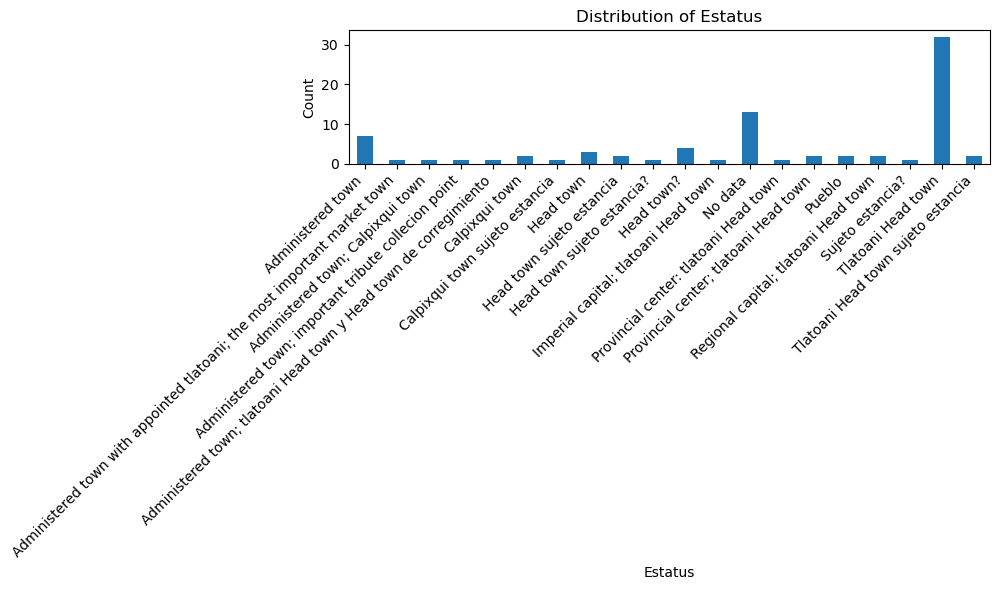

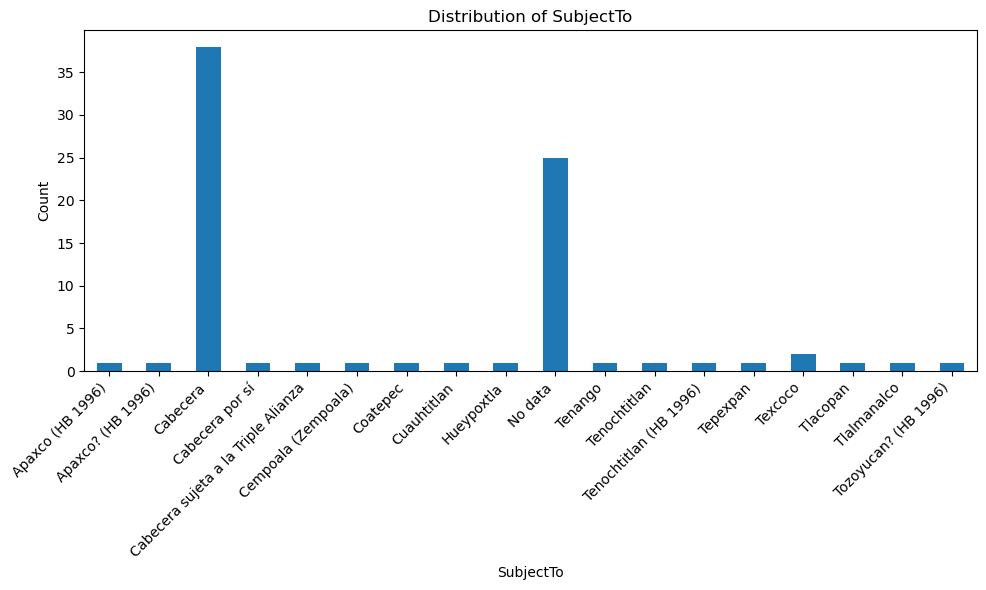

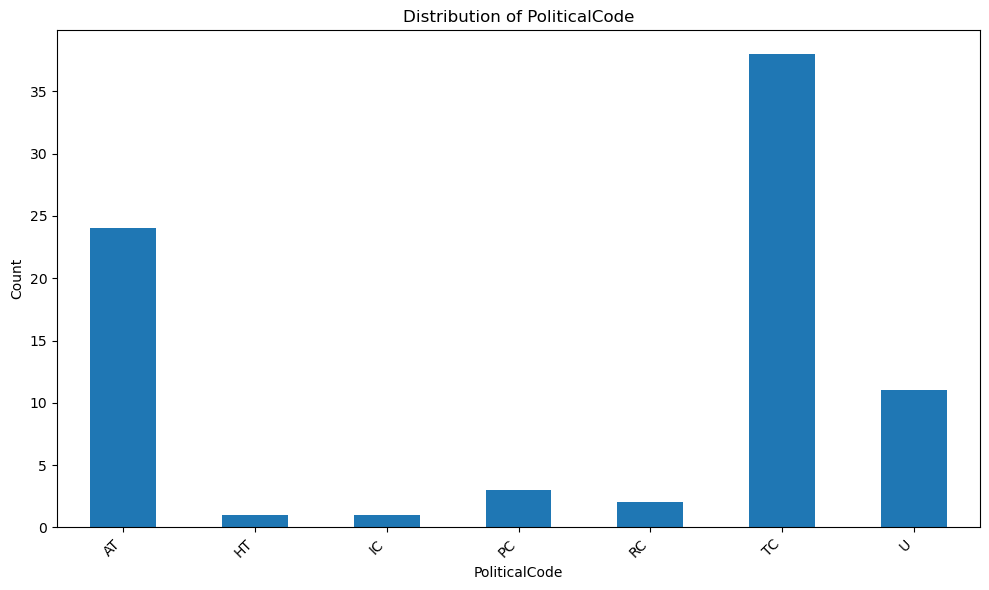

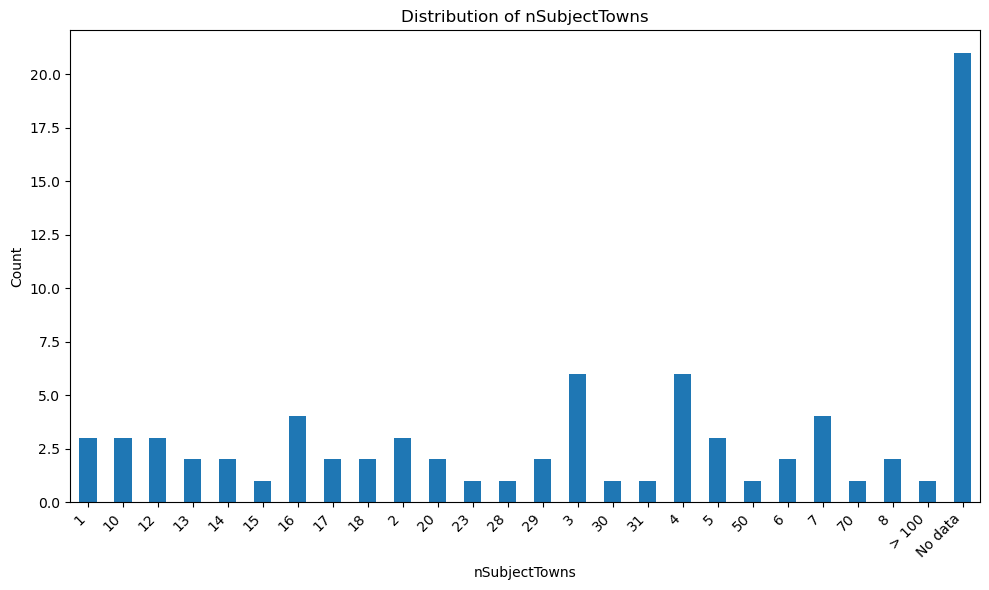

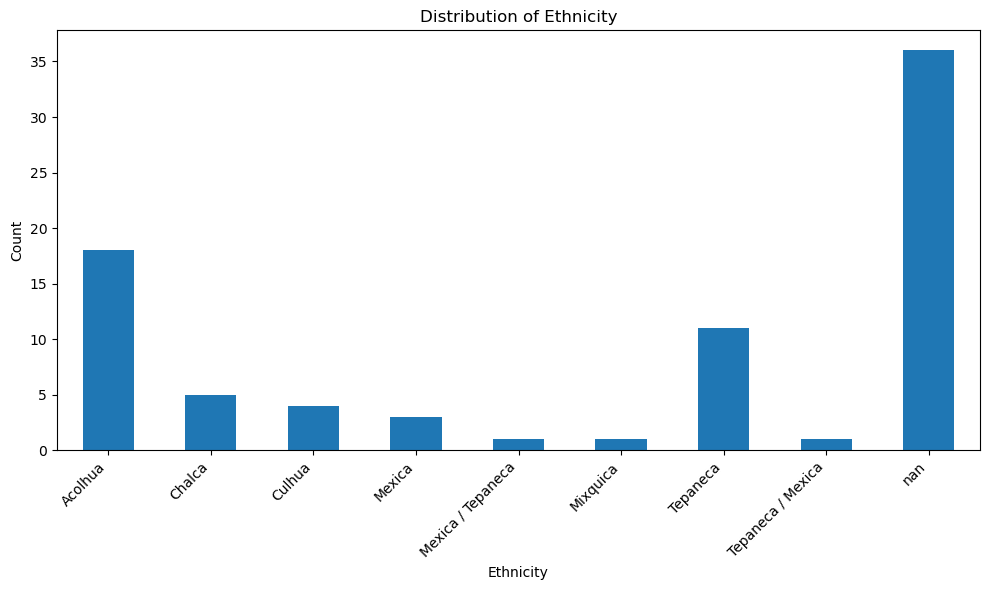

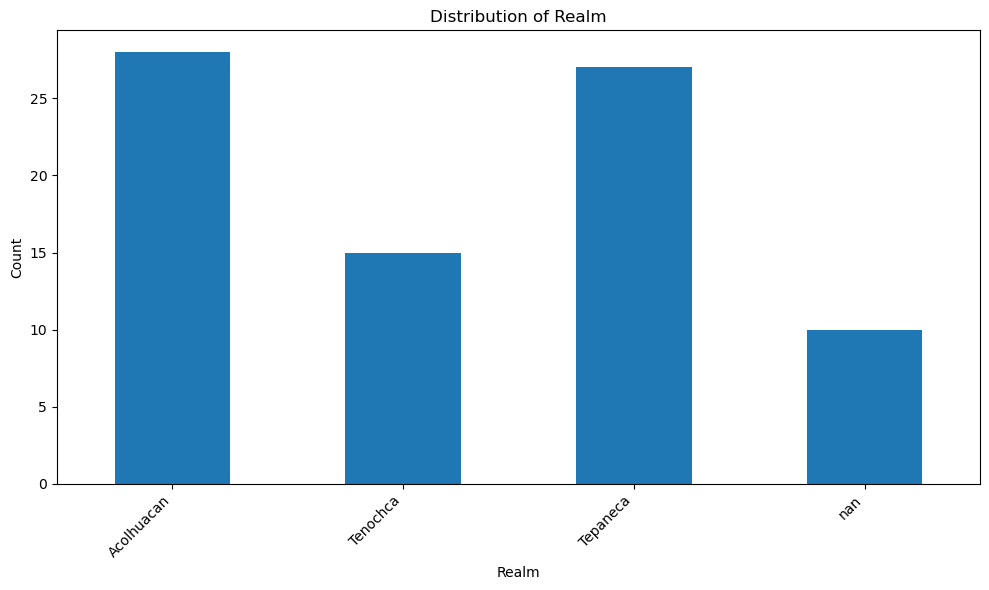

In [28]:
import matplotlib.pyplot as plt

columns_to_plot = ['Estatus', 'SubjectTo', 'PoliticalCode', 'nSubjectTowns', 'Ethnicity', 'Realm']

for col in columns_to_plot:
    counts = df_towns[col].value_counts(dropna=False)

    # Convert index to string for safe sorting and plotting
    counts.index = counts.index.map(str)
    counts = counts.sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
